In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_excel("c:\\Users\\Jay\\Interactive Data\\Final Project\\Final_Majestic_to_AIM_jan-2016tomarch-2018.xlsx")
df

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Date                                                     821 non-null    object 
 1   Origin Movement ID                                       821 non-null    int64  
 2   Origin Display Name                                      821 non-null    object 
 3   Destination Movement ID                                  821 non-null    int64  
 4   Destination Display Name                                 821 non-null    object 
 5   Daily Mean Travel Time (Seconds)                         821 non-null    int64  
 6   Daily Range - Lower Bound Travel Time (Seconds)          821 non-null    int64  
 7   Daily Range - Upper Bound Travel Time (Seconds)          821 non-null    int64  
 8   AM Mean Travel Time (Seconds) 

## Data cleaning 
1. Change the date format
2.

In [22]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
#Created a 'Day_of_Week' column to differentiate between weekdays and weekends.
df['Day_of_Week'] = df['Date'].dt.day_name()
df

,Date,Origin_Movement_ID,Origin_Display_Name,Destination_Movement_ID,Destination_Display_Name,Daily_Mean_Travel_Time_Seconds,Daily_Range_-_Lower_Bound_Travel_Time_Seconds,Daily_Range_-_Upper_Bound_Travel_Time_Seconds,AM_Mean_Travel_Time_Seconds,AM_Range_-_Lower_Bound_Travel_Time_Seconds,...,Midday_Mean_Travel_Time_Seconds,Midday_Range_-_Lower_Bound_Travel_Time_Seconds,Midday_Range_-_Upper_Bound_Travel_Time_Seconds,Evening_Mean_Travel_Time_Seconds,Evening_Range_-_Lower_Bound_Travel_Time_Seconds,Evening_Range_-_Upper_Bound_Travel_Time_Seconds,Early_Morning_Mean_Travel_Time_Seconds,Early_Morning_Range_-_Lower_Bound_Travel_Time_Seconds,Early_Morning_Range_-_Upper_Bound_Travel_Time_Seconds,Day_of_Week
0,2016-01-01,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2309,1719,3102,2209.0,1792.0,...,2674.0,2185.0,3274.0,2011,1596,2534,1945,1390,2723,Friday
1,2016-01-02,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2918,2080,4094,2952.0,2371.0,...,3274.0,2648.0,4048.0,2398,1760,3266,1588,1345,1876,Saturday
2,2016-01-03,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2738,1871,4005,2972.0,2376.0,...,2922.0,2459.0,3472.0,2765,1956,3908,1336,1114,1603,Sunday
3,2016-01-04,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2755,1907,3979,2816.0,2079.0,...,2658.0,2235.0,3161.0,2969,2070,4257,1410,1153,1725,Monday
4,2016-01-05,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2116,1632,2744,2037.0,1644.0,...,2264.0,1810.0,2833.0,2274,1801,2870,1489,1184,1872,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2017-12-29,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",3388,2253,5094,2724.0,2259.0,...,4019.0,3073.0,5256.0,3521,2381,5206,2144,1578,2913,Friday
817,2016-12-30,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2910,1912,4429,2341.0,1832.0,...,3201.0,2610.0,3925.0,3028,2092,4382,1433,1142,1800,Friday
818,2017-12-30,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",3006,1976,4573,2214.0,1872.0,...,3499.0,2826.0,4334.0,3315,2405,4568,1527,1269,1839,Saturday
819,2016-12-31,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2704,1882,3885,2082.0,1712.0,...,2948.0,2437.0,3566.0,3015,2376,3826,1463,1167,1835,Saturday


In [ ]:
df.info()

In [24]:
time_of_day_categories = ['Early_Morning', 'AM', 'Midday', 'PM', 'Evening']
df['Time_of_Day'] = pd.cut(df['Date'].dt.hour, bins=[-1, 7, 12, 17, 20, 24], labels=time_of_day_categories, ordered=True)

## Travel Time Variation 
- **Upper Bound Travel Time**: This line represents the maximum estimated travel time.
- **Lower Bound Travel Time**: This line represents the minimum estimated travel time.

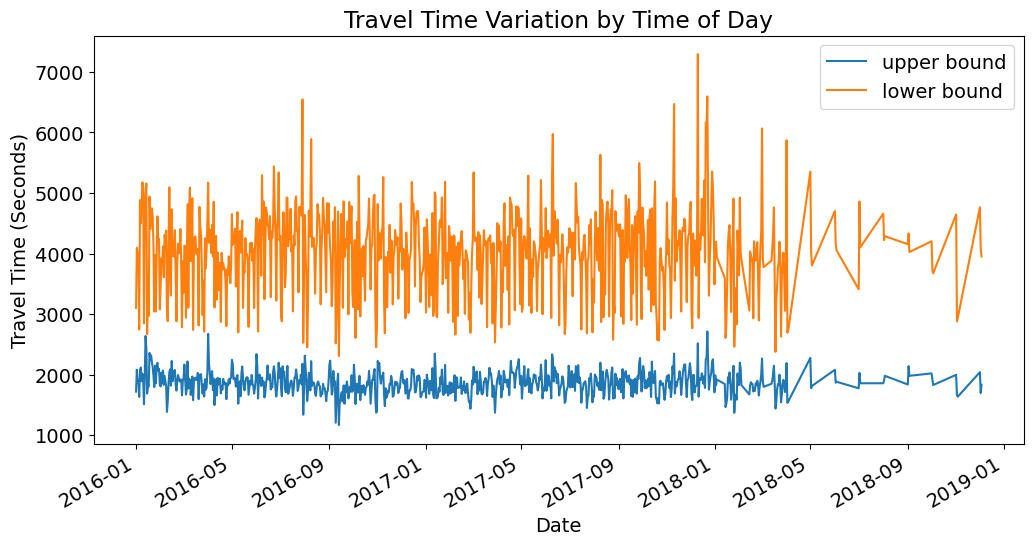

In [25]:
# Plot the travel time breakdown by time of day
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(x='Date', y=['Daily_Range_-_Lower_Bound_Travel_Time_Seconds','Daily_Range_-_Upper_Bound_Travel_Time_Seconds'], kind='line', ax=ax)
plt.title('Travel Time Variation by Time of Day')
plt.xlabel('Date')
plt.ylabel('Travel Time (Seconds)')
plt.legend(['upper bound', 'lower bound'])
plt.show()

## Daily Mean Travel Time
line plot to show the daily mean travel time over different days. It visualizes how the average travel time changes day by day.


## Weekend vs Weekday Mean Travel Time
calculates and compares the mean travel time for weekends and weekdays from a given dataset. It then prints out the average travel times for both weekends and weekdays.

In [27]:
df['Day'] = df['Date'].dt.day_name()
weekend_mean = df[df['Day'].isin(['Saturday', 'Sunday'])]['Daily_Mean_Travel_Time_Seconds']
weekday_mean = df[~df['Day'].isin(['Saturday', 'Sunday'])]['Daily_Mean_Travel_Time_Seconds']
print(f"Mean travel time on weekends: {weekend_mean} seconds")
print(f"Mean travel time on weekdays: {weekday_mean} seconds")

Mean travel time on weekends: 1      2918
2      2738
8      3229
9      3119
17     2920
       ... 
806    2405
807    2281
818    3006
819    2704
820    2440
Name: Daily_Mean_Travel_Time_Seconds, Length: 236, dtype: int64 seconds
Mean travel time on weekdays: 0      2309
3      2755
4      2116
5      3179
6      3085
       ... 
813    2525
814    3439
815    2568
816    3388
817    2910
Name: Daily_Mean_Travel_Time_Seconds, Length: 585, dtype: int64 seconds


## Peak Day for Commuting
identifies the day with the highest mean travel time, which is considered the peak day for commuting based on the dataset.


In [28]:
# 3. Peak hours and variations
peak_day = df['Daily_Mean_Travel_Time_Seconds'].idxmax()
print(f"Peak day for commuting: {df['Date'][peak_day].date()}")


Peak day for commuting: 2017-12-10


## Travel Time on Peak Day

In [29]:
peak_data = df.iloc[peak_day]
print(f"Travel time on peak day: {peak_data['Daily_Mean_Travel_Time_Seconds']} seconds")

Travel time on peak day: 4283 seconds


## Plotting Overall Daily Mean Travel Time for Specific Years

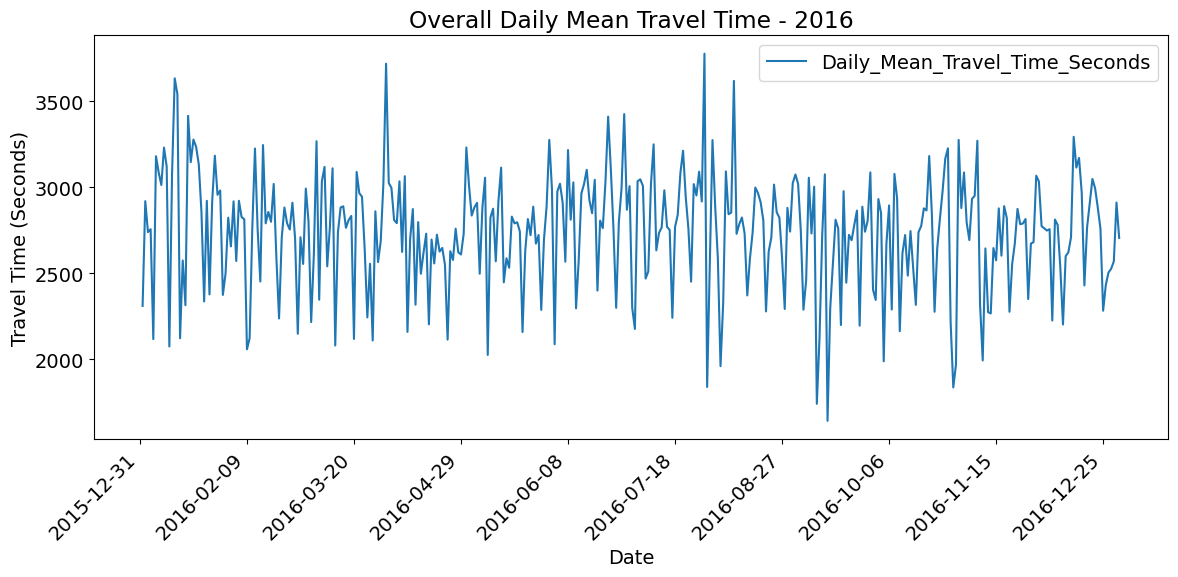

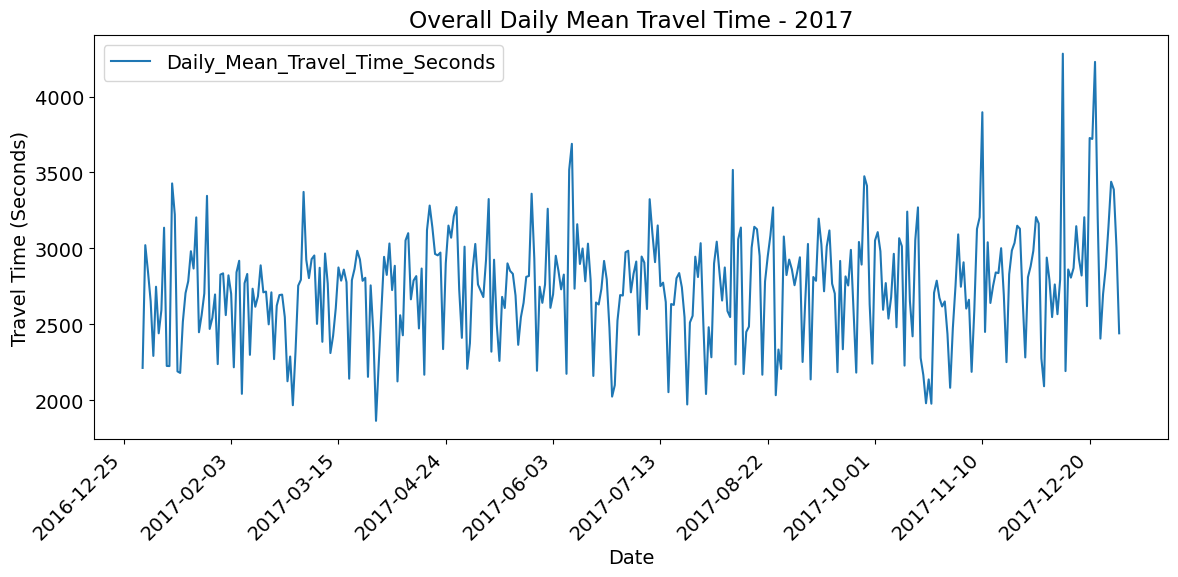

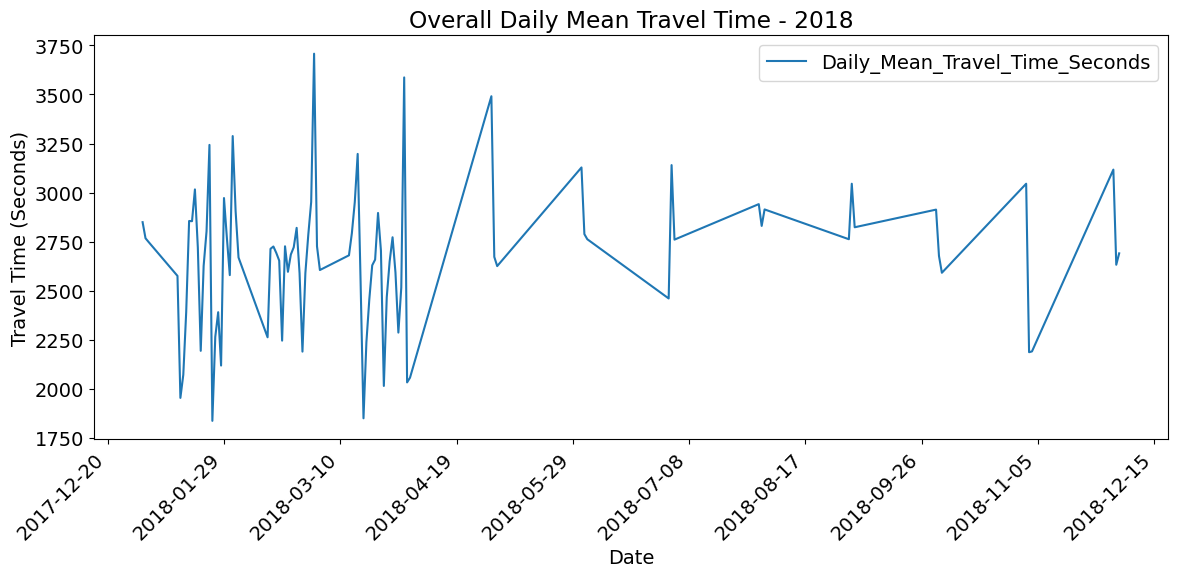

In [30]:
# Set font size for axis labels and tick labels
plt.rcParams.update({'font.size': 14})

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter DataFrame to include only the year 2016
df_2016 = df[df['Date'].dt.year == 2016]

# Create a single subplot for the overall daily mean travel time
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the overall daily mean travel time
df_2016.plot(x='Date', y='Daily_Mean_Travel_Time_Seconds', kind='line', ax=ax)
ax.set_title('Overall Daily Mean Travel Time - 2016')
ax.set_xlabel('Date')
ax.set_ylabel('Travel Time (Seconds)')

# Customize x-axis to display all months
ax.xaxis.set_major_locator(plt.MaxNLocator(12))  # Set maximum number of x-axis ticks to 12 (one for each month)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()

# Repeat the above code for years 2017, 2018, and 2019 to show individual plots for each year
df_2017 = df[df['Date'].dt.year == 2017]
fig, ax = plt.subplots(figsize=(12, 6))
df_2017.plot(x='Date', y='Daily_Mean_Travel_Time_Seconds', kind='line', ax=ax)
ax.set_title('Overall Daily Mean Travel Time - 2017')
ax.set_xlabel('Date')
ax.set_ylabel('Travel Time (Seconds)')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_2018 = df[df['Date'].dt.year == 2018]
fig, ax = plt.subplots(figsize=(12, 6))
df_2018.plot(x='Date', y='Daily_Mean_Travel_Time_Seconds', kind='line', ax=ax)
ax.set_title('Overall Daily Mean Travel Time - 2018')
ax.set_xlabel('Date')
ax.set_ylabel('Travel Time (Seconds)')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



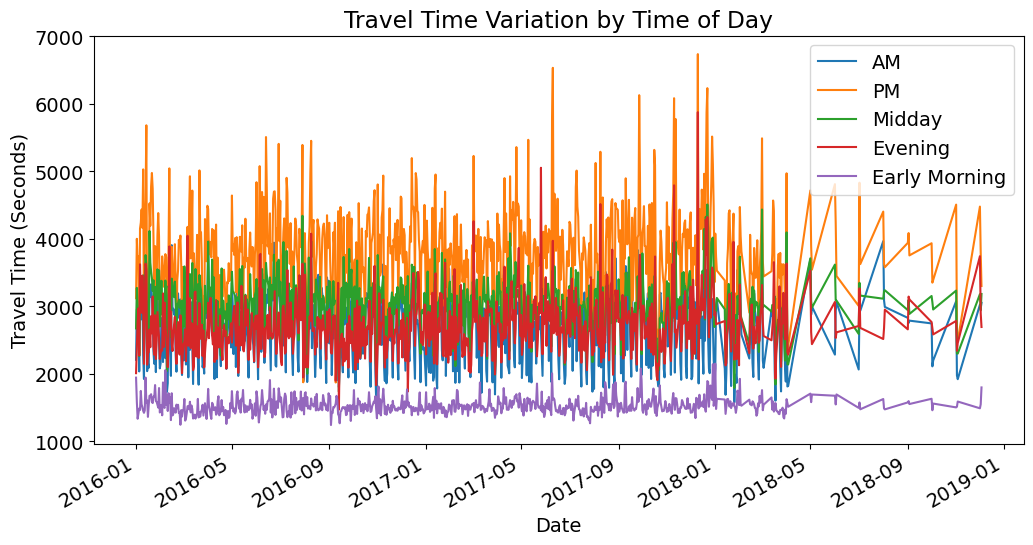

In [31]:
# Plot the travel time breakdown by time of day
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(x='Date', y=['AM_Mean_Travel_Time_Seconds', 'PM_Mean_Travel_Time_Seconds', 'Midday_Mean_Travel_Time_Seconds', 'Evening_Mean_Travel_Time_Seconds', 'Early_Morning_Mean_Travel_Time_Seconds'], kind='line', ax=ax)
plt.title('Travel Time Variation by Time of Day')
plt.xlabel('Date')
plt.ylabel('Travel Time (Seconds)')
plt.legend(['AM', 'PM', 'Midday', 'Evening', 'Early Morning'])
plt.show()

C:\Users\srika\AppData\Local\Temp\ipykernel_16540\1797903566.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Date', y='Travel_Time', data=df_filtered,


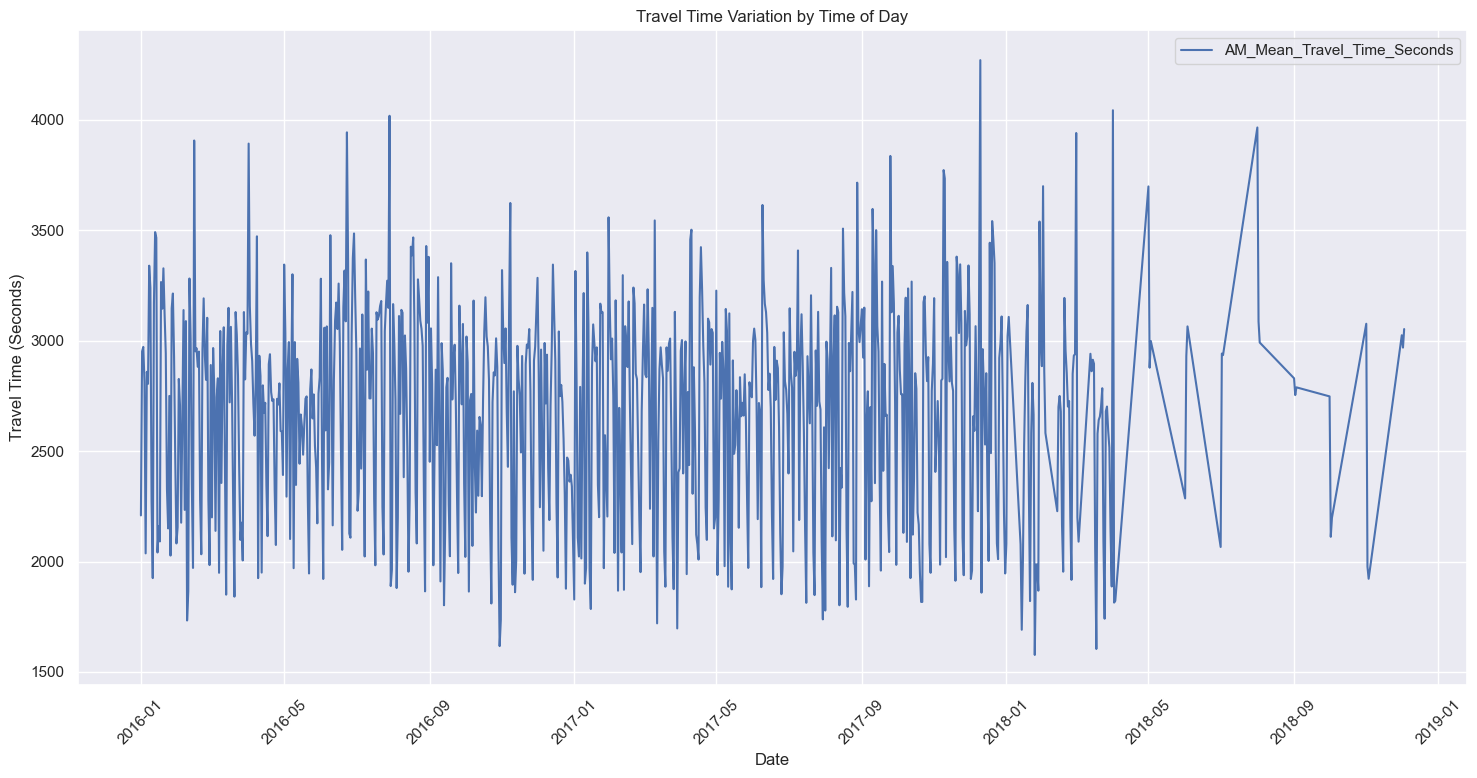

C:\Users\srika\AppData\Local\Temp\ipykernel_16540\1797903566.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Date', y='Travel_Time', data=df_filtered,


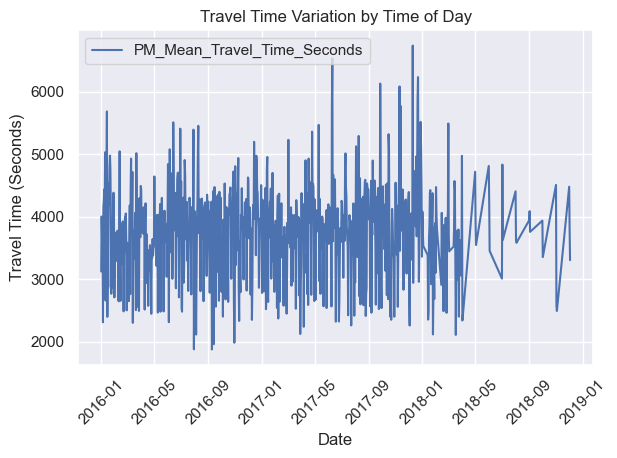

C:\Users\srika\AppData\Local\Temp\ipykernel_16540\1797903566.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Date', y='Travel_Time', data=df_filtered,


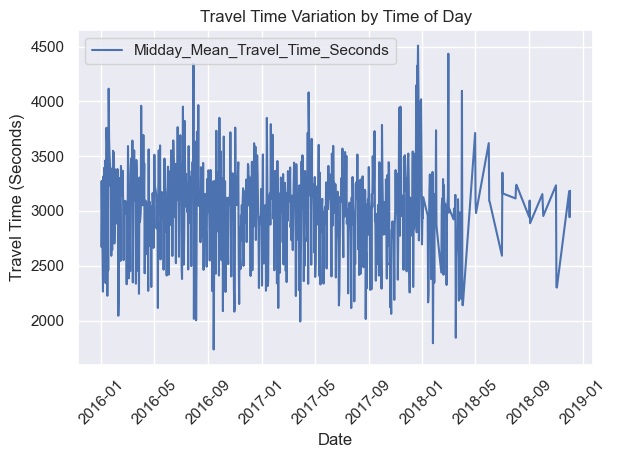

C:\Users\srika\AppData\Local\Temp\ipykernel_16540\1797903566.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Date', y='Travel_Time', data=df_filtered,


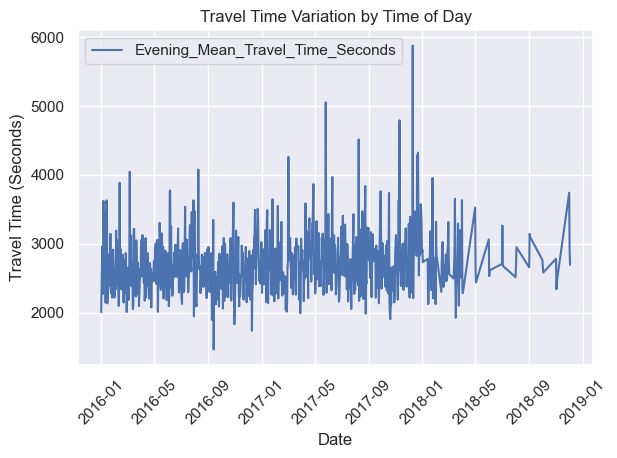

C:\Users\srika\AppData\Local\Temp\ipykernel_16540\1797903566.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Date', y='Travel_Time', data=df_filtered,


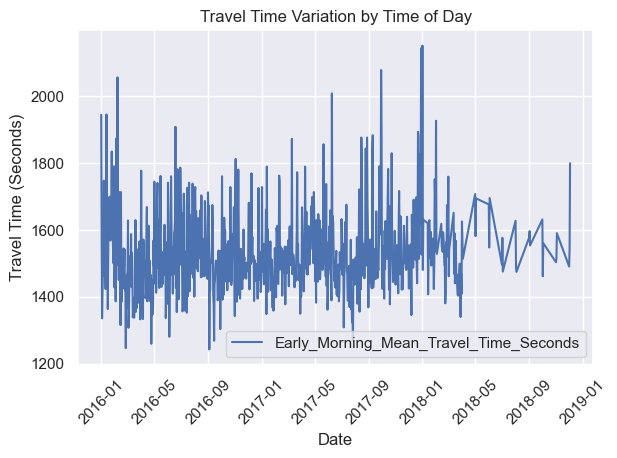

In [ ]:


# Melt the dataframe to long format
df_melted = df.melt(id_vars=['Date'], value_vars=times_of_day, 
                    var_name='Time_of_Day', value_name='Travel_Time')

# Create a figure with a larger size
plt.figure(figsize=(15, 8))

# Plot each time of day separately
for time in times_of_day:
    # Filter the data for the current time of day
    df_filtered = df_melted[df_melted['Time_of_Day'] == time]
    
    # Plot the data
    sns.lineplot(x='Date', y='Travel_Time', data=df_filtered,
                 palette='viridis', markers=True, dashes=False,
                 label=time)
    
    # Set the x-axis label
    plt.xlabel('Date')
    
    # Set the y-axis label
    plt.ylabel('Travel Time (Seconds)')
    
    # Set the title
    plt.title('Travel Time Variation by Time of Day')
    
    # Rotate the x-axis labels
    plt.xticks(rotation=45)
    
    # Ensure tight layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [36]:
df

,Date,Origin_Movement_ID,Origin_Display_Name,Destination_Movement_ID,Destination_Display_Name,Daily_Mean_Travel_Time_Seconds,Daily_Range_-_Lower_Bound_Travel_Time_Seconds,Daily_Range_-_Upper_Bound_Travel_Time_Seconds,AM_Mean_Travel_Time_Seconds,AM_Range_-_Lower_Bound_Travel_Time_Seconds,...,Midday_Range_-_Upper_Bound_Travel_Time_Seconds,Evening_Mean_Travel_Time_Seconds,Evening_Range_-_Lower_Bound_Travel_Time_Seconds,Evening_Range_-_Upper_Bound_Travel_Time_Seconds,Early_Morning_Mean_Travel_Time_Seconds,Early_Morning_Range_-_Lower_Bound_Travel_Time_Seconds,Early_Morning_Range_-_Upper_Bound_Travel_Time_Seconds,Day_of_Week,Time_of_Day,Day
0,2016-01-01,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2309,1719,3102,2209.0,1792.0,...,3274.0,2011,1596,2534,1945,1390,2723,Friday,Early_Morning,Friday
1,2016-01-02,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2918,2080,4094,2952.0,2371.0,...,4048.0,2398,1760,3266,1588,1345,1876,Saturday,Early_Morning,Saturday
2,2016-01-03,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2738,1871,4005,2972.0,2376.0,...,3472.0,2765,1956,3908,1336,1114,1603,Sunday,Early_Morning,Sunday
3,2016-01-04,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2755,1907,3979,2816.0,2079.0,...,3161.0,2969,2070,4257,1410,1153,1725,Monday,Early_Morning,Monday
4,2016-01-05,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2116,1632,2744,2037.0,1644.0,...,2833.0,2274,1801,2870,1489,1184,1872,Tuesday,Early_Morning,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2017-12-29,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",3388,2253,5094,2724.0,2259.0,...,5256.0,3521,2381,5206,2144,1578,2913,Friday,Early_Morning,Friday
817,2016-12-30,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2910,1912,4429,2341.0,1832.0,...,3925.0,3028,2092,4382,1433,1142,1800,Friday,Early_Morning,Friday
818,2017-12-30,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",3006,1976,4573,2214.0,1872.0,...,4334.0,3315,2405,4568,1527,1269,1839,Saturday,Early_Morning,Saturday
819,2016-12-31,100,"Kempegowda, Majestic, Bengaluru, Karnataka",171,"Analytics India Magazine, #280, 2nd floor, 5th...",2704,1882,3885,2082.0,1712.0,...,3566.0,3015,2376,3826,1463,1167,1835,Saturday,Early_Morning,Saturday


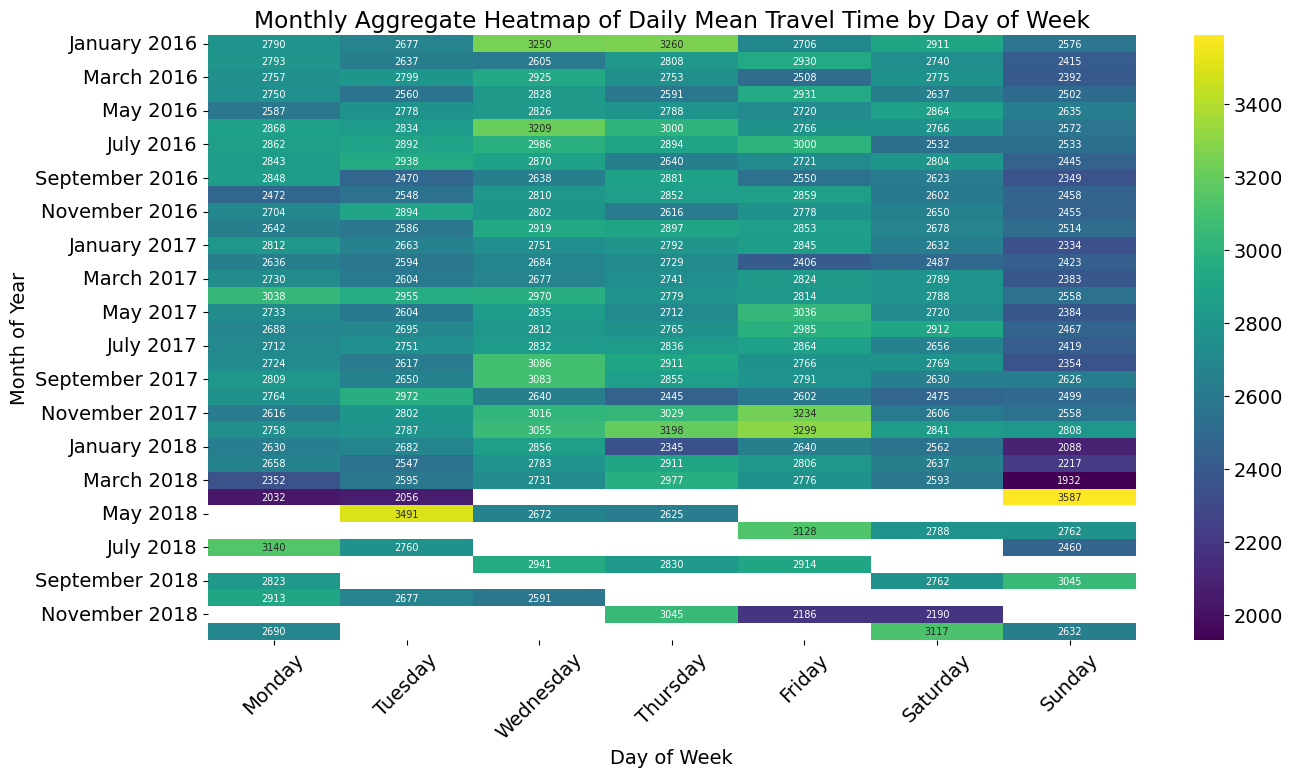

In [63]:
# Sorting data by 'Day of Week' after categorizing to ensure correct order
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
sorted_data = df.sort_values('Day_of_Week')

# Preparing data for heatmap
daily_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='W'), columns='Day_of_Week', values='Daily_Mean_Travel_Time_Seconds')

# Aggregating data monthly instead of weekly to reduce complexity
monthly_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='M'), columns='Day_of_Week', values='Daily_Mean_Travel_Time_Seconds')
# Format the index of monthly_means to month names
monthly_means.index = monthly_means.index.strftime('%B %Y')

# Recreate the heatmap with month names as row labels
plt.figure(figsize=(14, 8))  # Adjust figure size for better visibility
heatmap = sns.heatmap(monthly_means, cmap='viridis', annot=True, fmt=".0f", annot_kws={"size": 7})  # Adjust annotations for better fit
plt.title('Monthly Aggregate Heatmap of Daily Mean Travel Time by Day of Week')
plt.ylabel('Month of Year')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit axis labels



In [64]:
# Handle missing data by ensuring every date is represented
# Creating a date range from the minimum to maximum date in the dataset
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')

# Group the data by date and compute the mean travel time, reindexing to the full date range to include missing dates
line_data_full = df.groupby(df['Date'].dt.date).agg({'Daily_Mean_Travel_Time_Seconds': 'mean'}).reindex(date_range.date, fill_value=np.nan)

# Rename columns for better clarity
line_data_full.rename(columns={'Daily_Mean_Travel_Time_Seconds': 'Mean Travel Time'}, inplace=True)

# Reset index to convert the index into a column
line_data_full.reset_index(inplace=True)
line_data_full.rename(columns={'index': 'Date'}, inplace=True)

# Create an updated interactive line plot showing all dates, including those with missing data
updated_line_plot = px.line(
    line_data_full,
    x='Date',
    y='Mean Travel Time',
    title='Daily Mean Travel Time Over the Year with Missing Data Indicated',
    labels={'Date': 'Date', 'Mean Travel Time': 'Travel Time (Seconds)'}
)

# Show the plot
updated_line_plot.show()

In [69]:
import pandas as pd
import plotly.express as px

# 'df' is  DataFrame and it includes a 'Date' and 'AM_Mean_Travel_Time_Seconds' column
date_range_am = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
am_travel_data_full = df.set_index('Date').reindex(date_range_am, fill_value=np.nan).reset_index()

# Rename the 'index' column if necessary
am_travel_data_full.rename(columns={'index': 'Date'}, inplace=True)

# Create the line plot
updated_am_line_plot = px.line(
    am_travel_data_full,
    x='Date',
    y='AM_Mean_Travel_Time_Seconds',
    title='Daily Mean Morning Travel Time Over the Year with Missing Data Indicated',
    labels={'Date': 'Date', 'Mean Morning Travel Time': 'Travel Time (Seconds)'}
)

updated_am_line_plot.show()


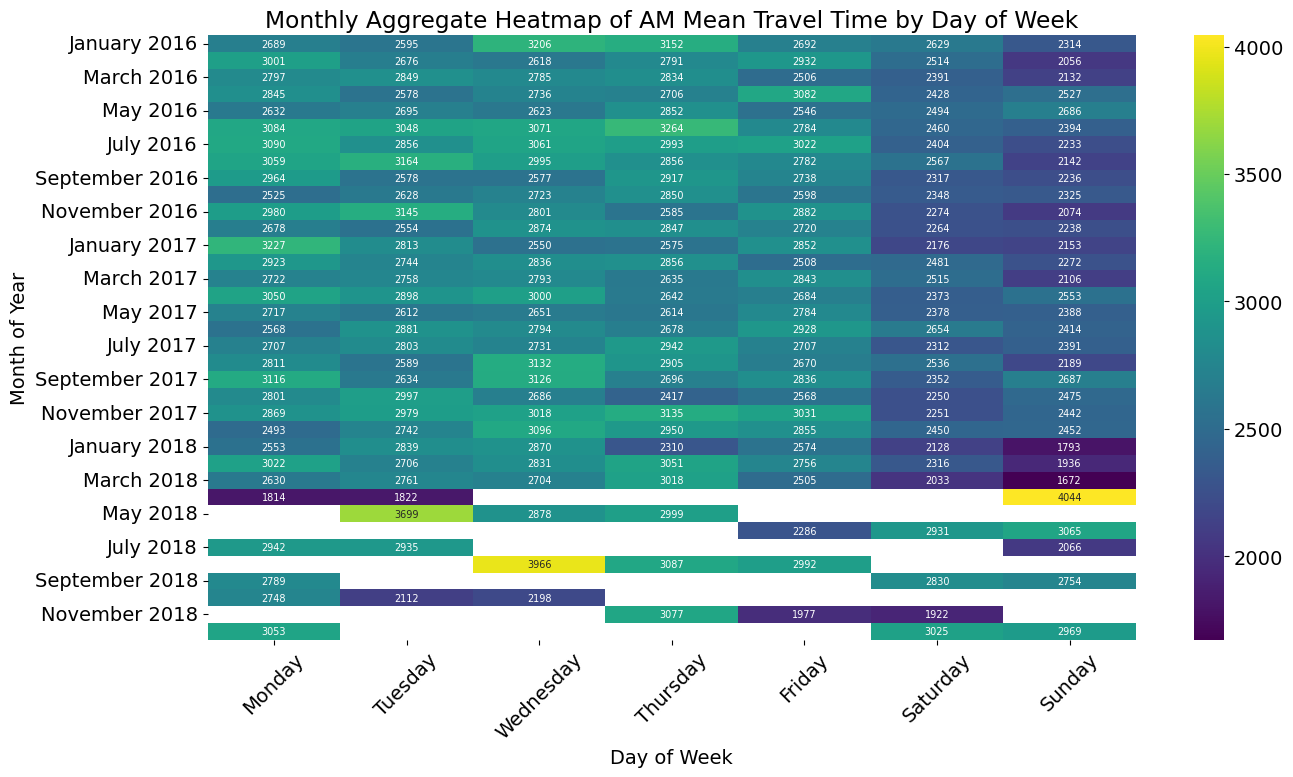

In [71]:
# Sorting data by 'Day of Week' after categorizing to ensure correct order
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
sorted_data = df.sort_values('Day_of_Week')

# Preparing data for heatmap
daily_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='W'), columns='Day_of_Week', values='AM_Mean_Travel_Time_Seconds')

# Aggregating data monthly instead of weekly to reduce complexity
monthly_means = sorted_data.pivot_table(index=pd.Grouper(key='Date', freq='M'), columns='Day_of_Week', values='AM_Mean_Travel_Time_Seconds')
# Format the index of monthly_means to month names
monthly_means.index = monthly_means.index.strftime('%B %Y')

# Recreate the heatmap with month names as row labels
plt.figure(figsize=(14, 8))  # Adjust figure size for better visibility
heatmap = sns.heatmap(monthly_means, cmap='viridis', annot=True, fmt=".0f", annot_kws={"size": 7})  # Adjust annotations for better fit
plt.title('Monthly Aggregate Heatmap of AM Mean Travel Time by Day of Week')
plt.ylabel('Month of Year')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit axis labels